## Exploratory Analysis
This type of analysis aims to provide an understanding of the data, using numerical and graphical methods, providing an in-depth view for the application of the models and consequently the extraction of knowledge.

In [1]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler

from lib import plotModule
import warnings
warnings.filterwarnings("ignore")

In [2]:
dfPoints = pd.read_csv("data/df_points.txt", delimiter="\t")
dfPoints.head(10).T

0           1           2           3           4  \
Unnamed: 0    0.000000    1.000000    2.000000    3.000000    4.000000   
x           326.488285 -314.287214 -328.208910 -148.658890 -467.065931   
y           188.988808  307.276723  181.627758  147.027947  250.467651   
z          -312.205307 -179.037412  446.311062  -27.477959 -306.475330   
label         0.000000    1.000000    1.000000    1.000000    1.000000   

                     5           6           7           8           9  
Unnamed: 0    5.000000    6.000000    7.000000    8.000000    9.000000  
x           -23.863985    3.660812  405.406480 -467.877206  343.457737  
y           -44.084565 -252.599973  124.734595  -49.022047  142.910428  
z          -276.796280 -445.044071  482.317678 -340.056094   10.563133  
label         1.000000    1.000000    1.000000    0.000000    0.000000

In [3]:
# Removing column Unnamed:0 since our dataframe
# already contains index data for each row

dfPoints.drop('Unnamed: 0', axis=1, inplace=True)
dfPoints.head(10).T

0           1           2           3           4           5  \
x      326.488285 -314.287214 -328.208910 -148.658890 -467.065931  -23.863985   
y      188.988808  307.276723  181.627758  147.027947  250.467651  -44.084565   
z     -312.205307 -179.037412  446.311062  -27.477959 -306.475330 -276.796280   
label    0.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7           8           9  
x        3.660812  405.406480 -467.877206  343.457737  
y     -252.599973  124.734595  -49.022047  142.910428  
z     -445.044071  482.317678 -340.056094   10.563133  
label    1.000000    1.000000    0.000000    0.000000

In [20]:
# Since there is no NaN values on dataset, we don't need
# to apply an Imputer for replacing missing values

dfPoints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
 2   z       10000 non-null  float64
 3   label   10000 non-null  object 
dtypes: float64(3), object(1)
memory usage: 312.6+ KB


In [5]:
# Since all the variables have the same range (min-max values)
# there is no need to apply an Scaler for normalization

dfPoints.describe().T

count      mean         std         min         25%       50%  \
x      10000.0  0.850362  288.379928 -499.802348 -249.199895  3.663472   
y      10000.0 -3.108769  287.120263 -499.899134 -248.954580 -5.446168   
z      10000.0 -2.601124  290.379789 -499.952571 -258.005693 -8.221000   
label  10000.0  0.502700    0.500018    0.000000    0.000000  1.000000   

              75%         max  
x      248.879970  499.872453  
y      244.395864  499.752418  
z      252.930406  499.872329  
label    1.000000    1.000000

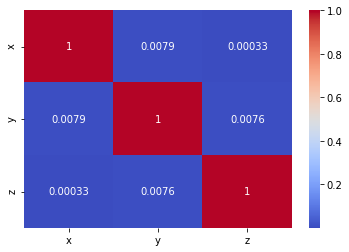

In [6]:
# The correlation heatmap shows the relationship between variables
# We can find that none of the columns are highly correlated to each other

data = dfPoints.drop('label', axis=1)
label = dfPoints['label']

corr_matrix = data.corr().abs()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

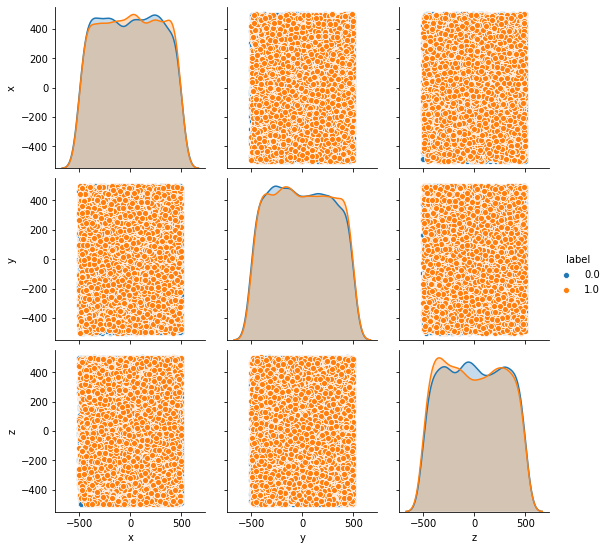

In [21]:
# The scatter plot between all variables shows that our data
# is equally distributed in space, making it difficult to
# separate by simple boundary detection methods

sns.pairplot(dfPoints, hue='label')

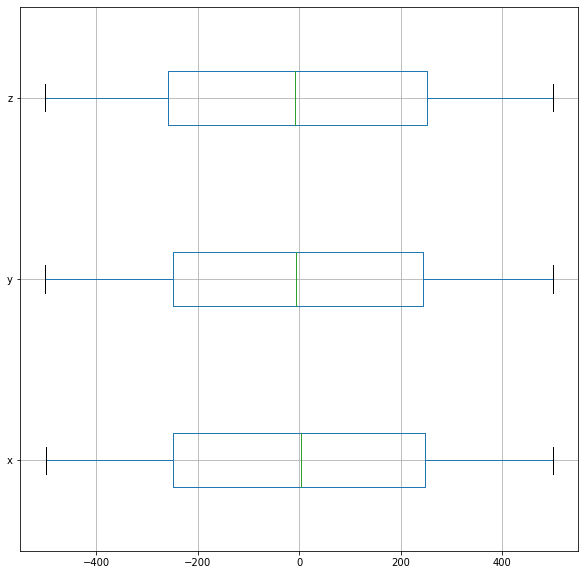

In [23]:
# There is no outlier in the dataset

data.boxplot(figsize=(10, 10), vert=False)
plt.show()

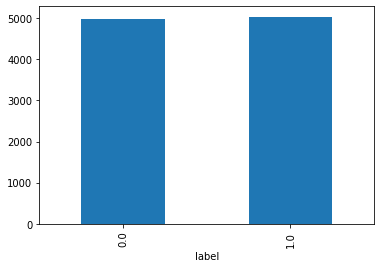

In [24]:
# The classes are balanced avoiding that the overall accuracy
# and decision making from being biased by the majority class

dfPoints.groupby('label').count()['x'].plot(kind='bar')

In [10]:
dfPoints['label'] = dfPoints['label'].astype(str)
fig = px.scatter_3d(dfPoints, x='x', y='y', z='z', color='label')
fig.update_layout(title='3D Plot of columns')

fig.show()

In [19]:
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
scaled = scaled.join(label)
df = scaled.copy()

n_steps = 100
step_size = (df['z'].max() - df['z'].min())/n_steps
df['z'] = df.apply(lambda row: int(row['z']/step_size), axis=1)

scatter = plotModule.ScatterSlider()
scatter.plot(
    df=df,
    coluna_x='x',
    coluna_y='y',
    coluna_steps='z',
    coluna_cor='label',
    colors={0: '#636efa', 1: '#ef553b'},
    title='Scatter plot for visualizing X-Y data in Z intervals'
)